# Principal Component Analysis

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that reduces the number of features (dimensions) while retaining the maximum variance in the data. By capturing the most important patterns in fewer components, PCA enhances data visualization and simplifies analysis.

We will now apply PCA to our filtered dataset and plot the resulting components to explore potential associations with study conditions. We will apply this transformation on filtered species. The code below perform that step.

In [1]:
#| echo: false

import pandas as pd

import numpy as np

# loading tab-seperated data file using pandas and transposing it
data = pd.read_csv('Nine_CRC_cohorts_taxon_profiles.tsv',sep='\t',header=None).T

# setting the first row as column names and then removing it
data = data.rename(columns=data.loc[0]).drop(0, axis=0)

# accessing Zeller et al., 2014 dataset
zeller_db = data.loc[data['dataset_name'] == 'ZellerG_2014',:]

# fetching microbacterial organism information-related columns
bacteria_colnames = [col for col in data.columns if 'k__Bacteria' in col]

# metadata colnames
metadata_colnames = ['dataset_name', 'sampleID', 'subjectID', 'body_site', 'study_condition',
                     'disease', 'age', 'age_category', 'gender', 'country','ajcc','alcohol',
                     'antibiotics_current_use','curator','disease_subtype','ever_smoke','fobt',
                     'hba1c','hdl','ldl','location','BMI']


import matplotlib.pyplot as plt

# dataset containing only bacterial microoganism's relative abundace
microbiome = zeller_db[bacteria_colnames]

# converting data types
for col in microbiome:
    microbiome.loc[:,col] = pd.to_numeric(microbiome[col], errors='coerce')

# fetching names of columns with abundance exceeding .001
columns_to_fetch = microbiome.columns[microbiome.max(axis=0) > 0.001]

# filtered dataset
microbiome_filtered = microbiome[columns_to_fetch]

# log transformation
microbiome_log = microbiome_filtered.applymap(lambda x: np.log10(x+.000001))

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# log transformed data from the previous step
df = microbiome_log

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA (reduce to 10 components for visualization)
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2','PCA3', 'PCA4','PCA5',
                                           'PCA6','PCA7', 'PCA8', 'PCA9', 'PCA10'])

pca_df['study_condition'] = zeller_db['study_condition'].values



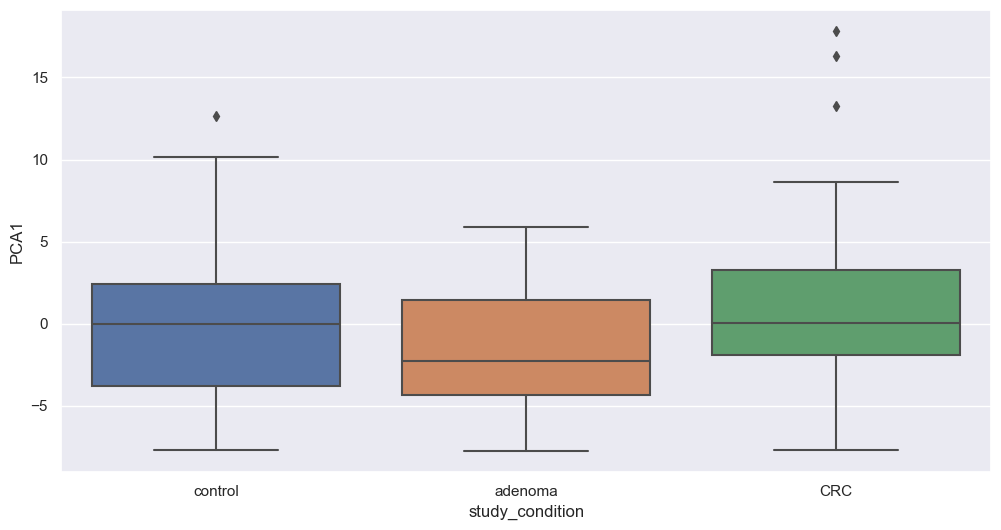

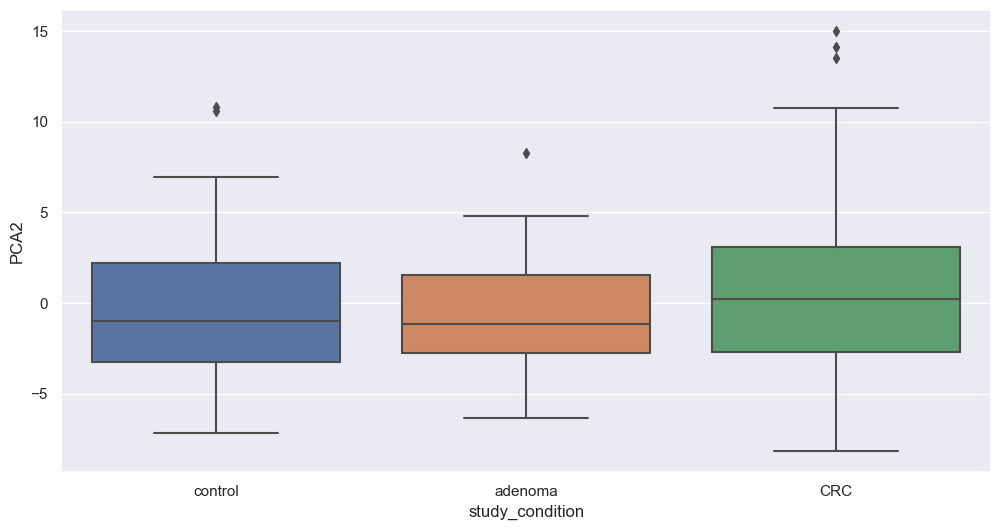

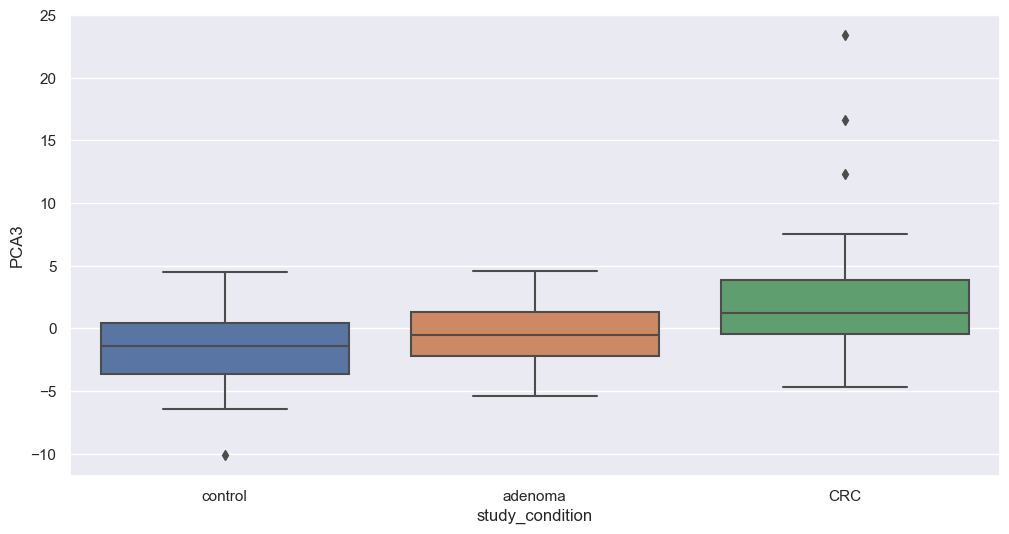

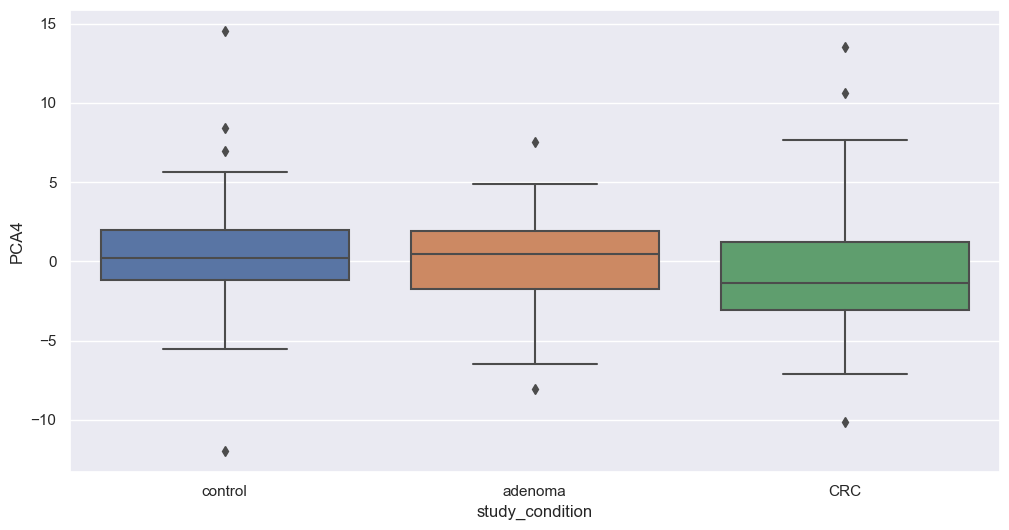

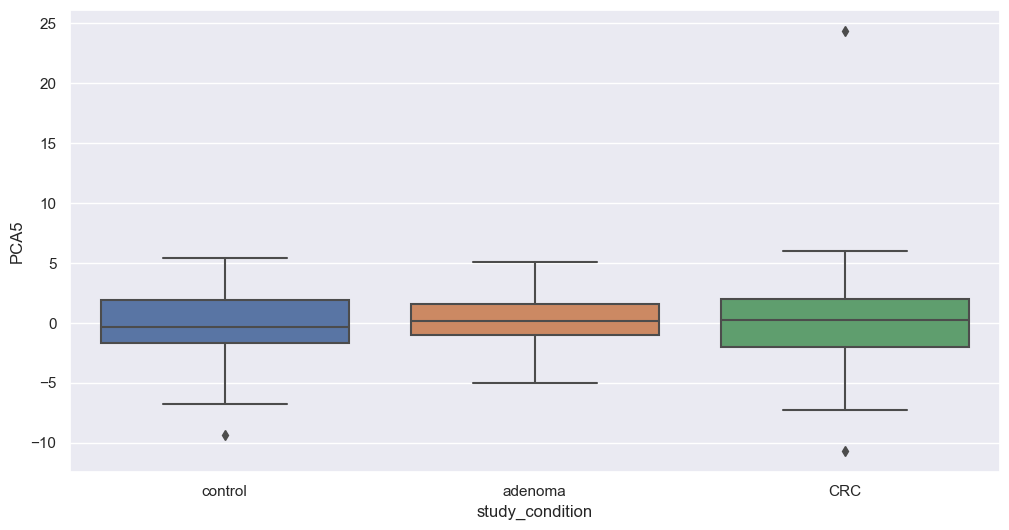

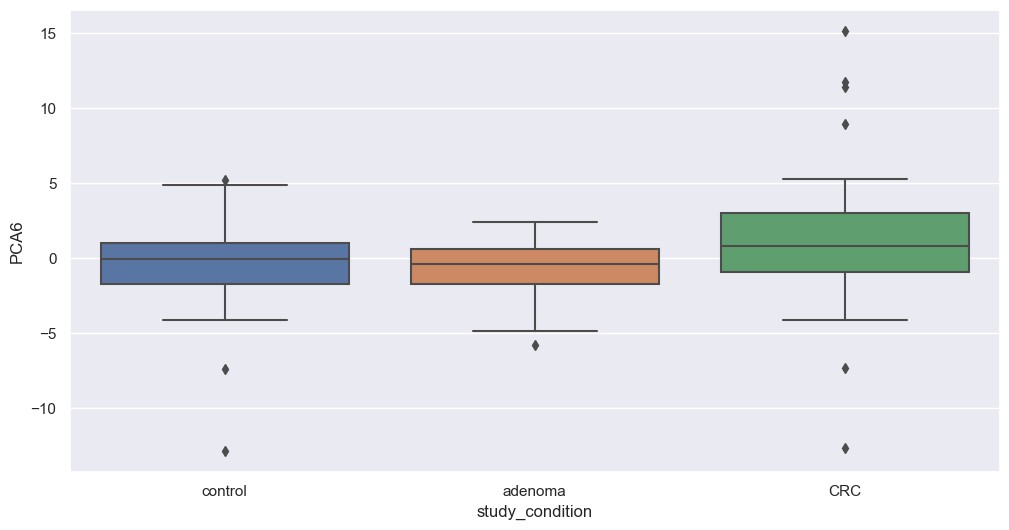

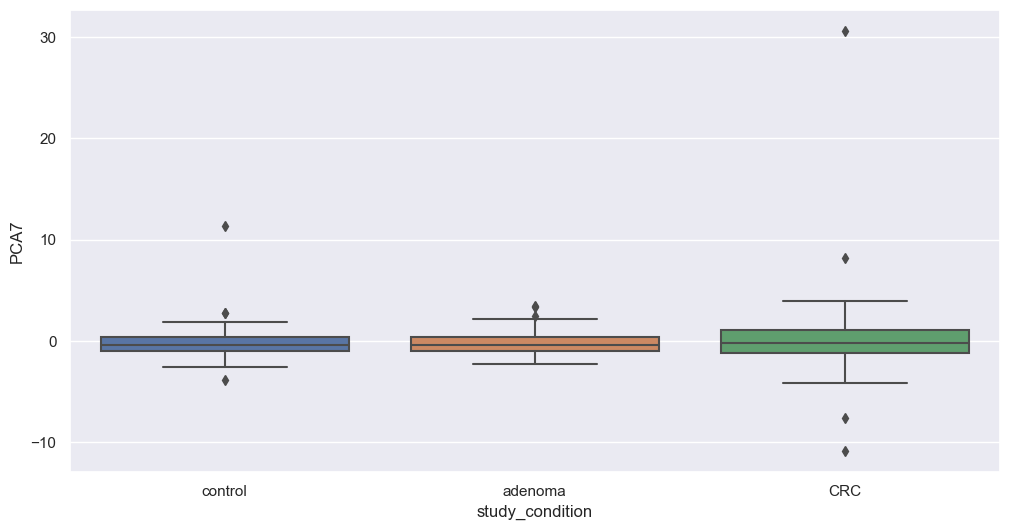

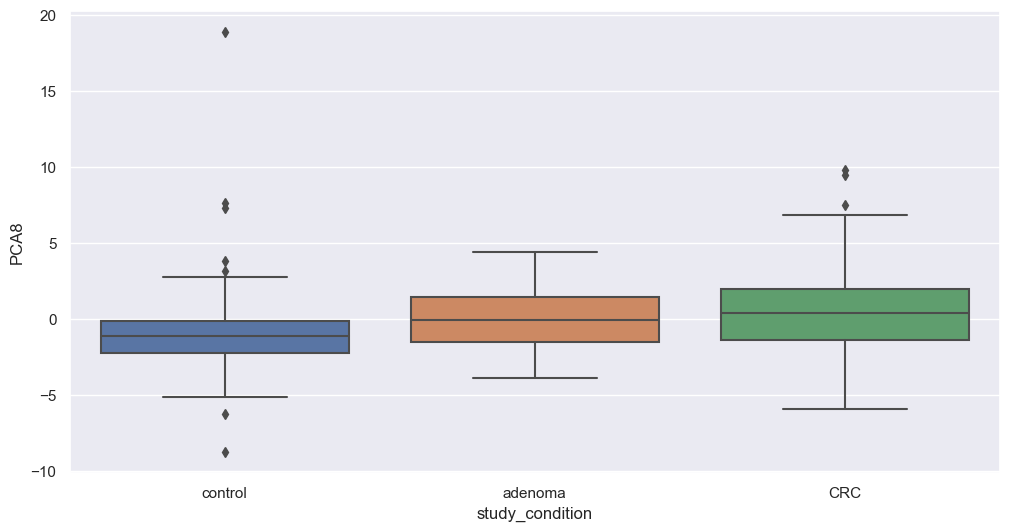

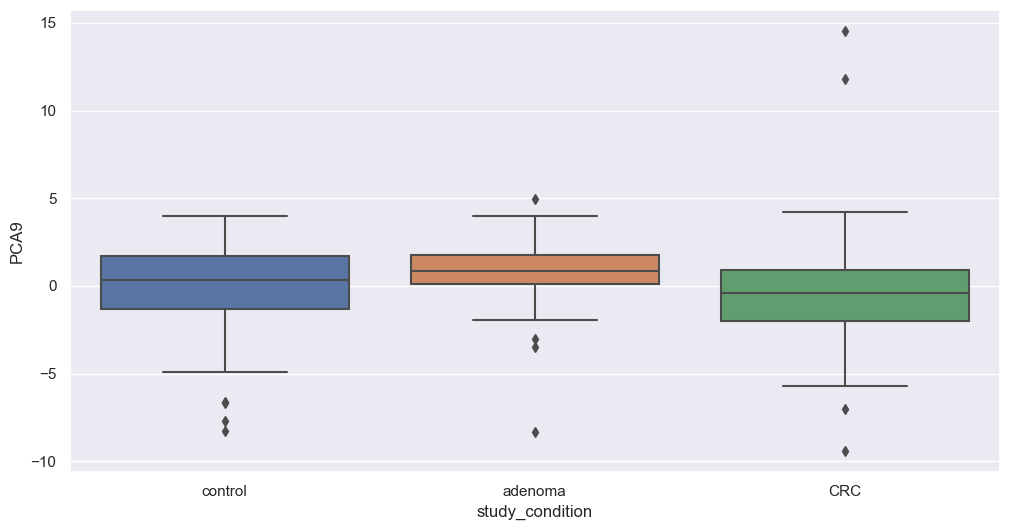

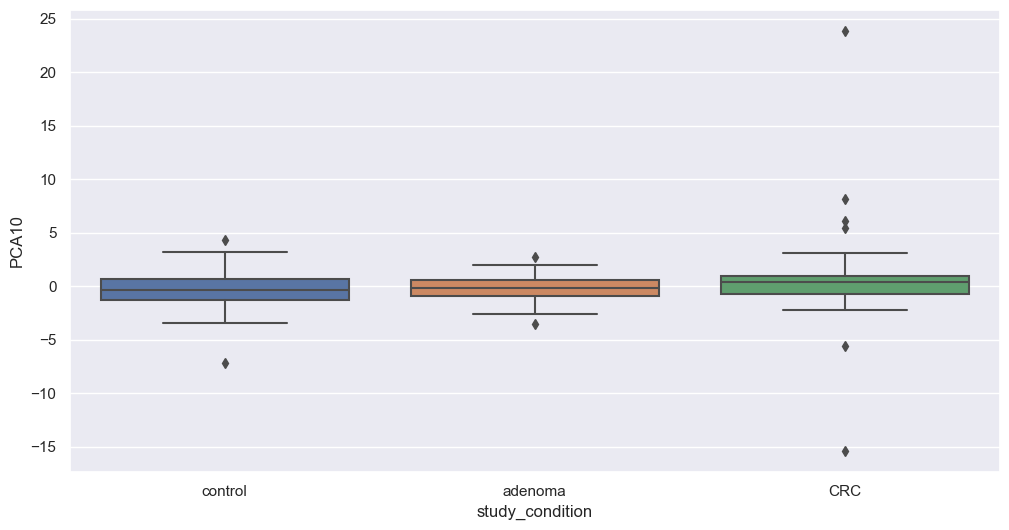

In [30]:
#| echo: false
#| label: fig-pca
#| fig-cap: "Principal components"
#| fig-subcap: 
#|   - "PCA1"
#|   - "PCA2"
#|   - "PCA3"
#|   - "PCA4"
#|   - "PCA5"
#|   - "PCA6"
#|   - "PCA7"
#|   - "PCA8"
#|   - "PCA9"
#|   - "PCA910"
#| layout-ncol: 2

# Set global figure size using sns.set()
sns.set(rc={"figure.figsize": (12, 6)})  # width = 12, height = 6


for comp in range(1,11):
    comp_label = 'PCA'+str(comp)
    plt.figure()
    sns.boxplot(pca_df,x='study_condition', y=comp_label)

@fig-var below shows the cumulative variance captured by 10 principal components, i.e. **26%**.

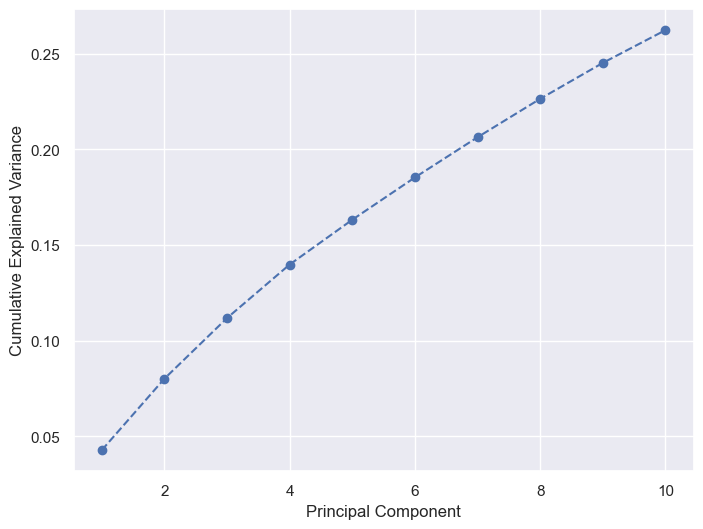

In [33]:
#| echo: false
#| label: fig-var
#| fig-cap: "Cumulative Explained Variance by Principal Components"
explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

We will utilize PCA components in our modeling phase to build a CRC detection system.